Advanced Python - Module 2 Project - Jake Duffin

Exploratory Data Analysis on Melbourne Housing

Introduction

This notebook is an exploritory analysis of housing data related to Melbourne, Australia.
Recently, the housing market in Melbourne has seen explosive growth. This notebook attempts to analyze trends in the housing market and try to determine insites that might be useful to an investor.

I will specifically analyzing the following elements and how they correlate with property value:
    Land size
    Year Built
    Region


In [6]:
# Import and Config

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Overview

In this section, the data set is imported and a basic summary is displayed.
This data set contains many great columns to choose from.

In [7]:
# Dataframe Creation and Summary

df = pd.read_csv('housing.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


Analysis ----

Price by Land Size
    This chart displays a scatter plot visualization of how land size is related to price, with the added nuance of being color coded by property type.
    We can see an interesting phenomenom occurring that creates a square like form.
        The property type "house" dramitically increasing in price without any meaningful land size increase.
        Alternatly, the property type "unit" has the oposite correlation, with the land size increasing without affecting price.
    This is likely due to the fact that "houses" are a more permanent dwelling and therefore have more resources invested in the property.

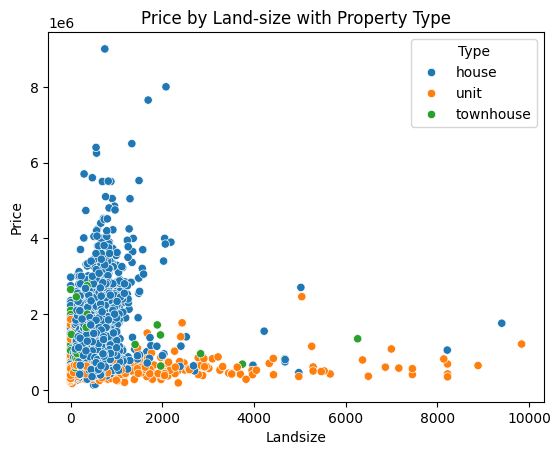

In [11]:
#Question 1 & 2

sns.scatterplot(data=df, x='Landsize', y='Price', hue='Type')

plt.title('Price by Land-size with Property Type')

plt.show()

Average Price by Year Built
    This section examines how the year a property is built relates the average property price.
        We can see that the pre-1950s, years produced a volatile distribution of price ranges.
        As time has gone on, the average property price has settled into a more stable, though lower, range.
    After doing further analysis on the row counts included in pre and post 1950 averages, I found that post-1950 property rows are over 3x the ammount of post 1950 properties.
        The pre-1950 volitility is likely due to the fact that there are much fewer properties observed pre-1950, and therefore the average is much more susceptible to outlier impact.
        The post-1950 property value averages are much more stable, as well as much lower in value. This indicates that the vast majority of these "newer" properties have much cheaper values.
            This is likely due to an exponential increase in population, which in turn, dramatically increases housing demand, leading to cheaper properties being built.

Pre-1950 row count: 1851
1950 and newer row count: 4996


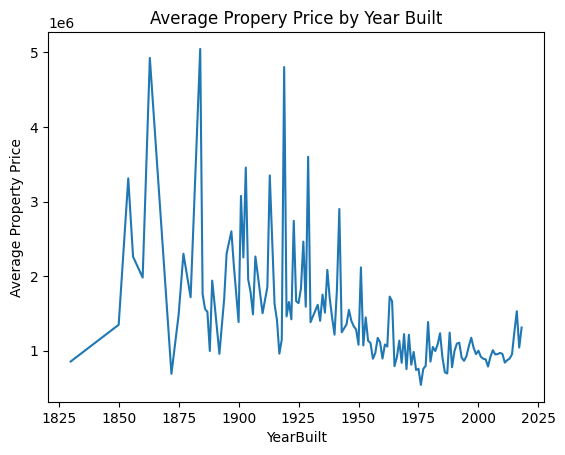

In [44]:
# Question 3 & 4

av_per_built = df.groupby(['YearBuilt'], as_index=False).agg({'Price' : 'mean'})

print("Pre-1950 row count:", len(df.loc[df['YearBuilt'] < 1950]))
print("1950 and newer row count:", len(df.loc[df['YearBuilt'] >= 1950]))

sns.lineplot(data=av_per_built, x='YearBuilt', y='Price')

plt.title('Average Propery Price by Year Built')
plt.ylabel('Average Property Price')

plt.show()

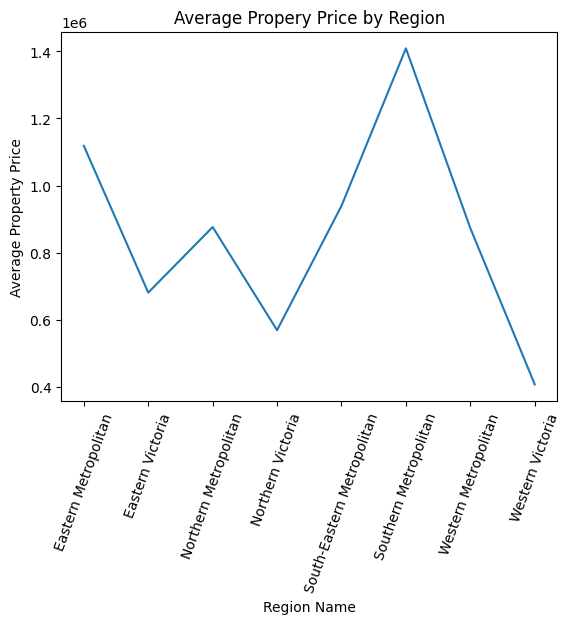

In [34]:
# Question 5 & 6

av_per_region = df.groupby(['Regionname'], as_index=False).agg({'Price' : 'mean'})

sns.lineplot(data=av_per_region, x='Regionname', y='Price')

plt.title('Average Propery Price by Region')

plt.xticks(rotation=70, size=10)
plt.xlabel('Region Name')
plt.ylabel('Average Property Price')

plt.show()

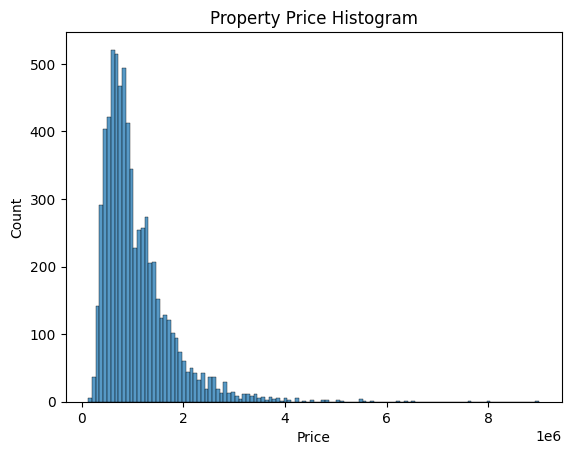

In [36]:
# Question 7 & 8

sns.histplot(data=df, x='Price')

plt.title('Property Price Histogram')

plt.show()

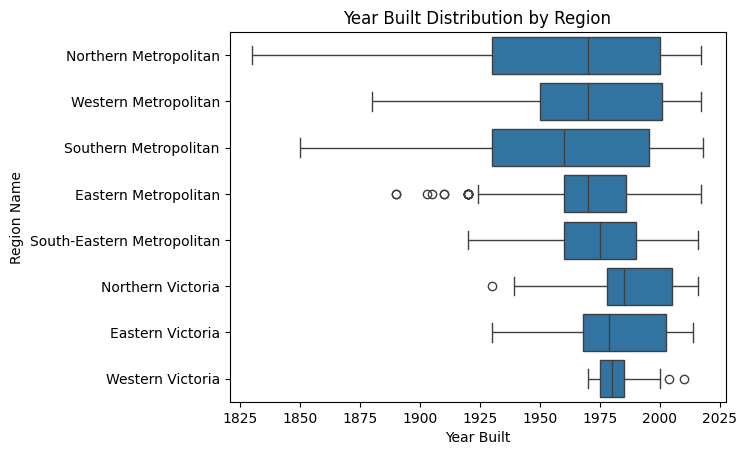

In [39]:
# Question 9 & 10 & 11

sns.boxplot(data=df, x='YearBuilt', y='Regionname')

plt.title('Year Built Distribution by Region')
plt.xlabel('Year Built')
plt.ylabel('Region Name')

plt.show()